# Load the dataset

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 
sns.set_style("darkgrid", {"grid.color": ".6","grid.linestyle": ":"})

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline 
#from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor 
#from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV

In [2]:
#Check the first five rows of the dataset
car_df = pd.read_csv('Australian Vehicle Prices.csv')
car_df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


As we can see , there many irrelevant features in the dataset to drop. 
The next step is to view the information in the dataset.

In [3]:
#Quick look at the data
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

- The data types are not consistent
- There are some null values in the dataset


# Data Cleaning  

Drop columns that are not useful

In [4]:
#Drop irrelevant columns
drp_col = ['DriveType','BodyType','Title','Car/Suv','ColourExtInt','Model','Doors','Seats']

car_df1 = car_df.drop(drp_col,axis=1)
car_df1.head()

,Brand,Year,UsedOrNew,Transmission,Engine,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,Price
0,Ssangyong,2022.0,DEMO,Automatic,"4 cyl, 2.2 L",Diesel,8.7 L / 100 km,5595,"Caringbah, NSW",4 cyl,51990
1,MG,2022.0,USED,Automatic,"4 cyl, 1.5 L",Premium,6.7 L / 100 km,16,"Brookvale, NSW",4 cyl,19990
2,BMW,2022.0,USED,Automatic,"4 cyl, 2 L",Premium,6.6 L / 100 km,8472,"Sylvania, NSW",4 cyl,108988
3,Mercedes-Benz,2011.0,USED,Automatic,"8 cyl, 5.5 L",Premium,11 L / 100 km,136517,"Mount Druitt, NSW",8 cyl,32990
4,Renault,2022.0,USED,Automatic,"4 cyl, 1.3 L",Unleaded,6 L / 100 km,1035,"Castle Hill, NSW",4 cyl,34990


In [5]:
#check for null values
car_df1.isna().sum()

Brand                  1
Year                   1
UsedOrNew              1
Transmission           1
Engine                 1
FuelType               1
FuelConsumption        1
Kilometres             1
Location             450
CylindersinEngine      1
Price                  3
dtype: int64

- There are 450 null values in the location column and fewer in the other columns


In [6]:
#fill up columns with less missing values with the mode
for col in car_df1.columns:
    if car_df1[col].isna().sum() < 5:
        md = car_df1[col].mode()[0]
        car_df1.loc[car_df1[col].isnull(),col] = md

#Check to see if there are still some null values        
car_df1.isnull().sum()


Brand                  0
Year                   0
UsedOrNew              0
Transmission           0
Engine                 0
FuelType               0
FuelConsumption        0
Kilometres             0
Location             450
CylindersinEngine      0
Price                  0
dtype: int64

- There are still 450 null values in thr location column.
- The location column will be separated to State and City features
- There are still some unwanted noises in the dataset
- Create a function to clean the data further.

In [7]:
#Write a function to convert objects to numerics and remove unwanted values
import numpy as np
def convert_to_num(x):
    try:
        #if the string contains ','
        if ',' in x:
            #Split the string
            token = str(x).split(',')
            return float(token[1][:-1])
        
        #if the string contains a '-' replace with nan
        elif x == '-':
            x = np.nan
            return x
        #if the string contains a '/'
        elif '/' in x:
            token = str(x).strip().split("/")
            a = float(token[0].strip()[:-1])
            b = float(token[1].strip()[:-2])
            c = (a / b)
            return c
        else:
            token = str(x).split(' ')
            return int(token[0])
    except:
        return x

In [8]:
#A function to apply to all columns
def frmt_df(df):
    for i in df.columns:
        df[i]= df[i].apply(convert_to_num)
    return df    
        

In [9]:
car_df2 = frmt_df(car_df1)
car_df2.head()

,Brand,Year,UsedOrNew,Transmission,Engine,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,Price
0,Ssangyong,2022.0,DEMO,Automatic,2.2,Diesel,0.087,5595,"Caringbah, NSW",4.0,51990
1,MG,2022.0,USED,Automatic,1.5,Premium,0.067,16,"Brookvale, NSW",4.0,19990
2,BMW,2022.0,USED,Automatic,2.0,Premium,0.066,8472,"Sylvania, NSW",4.0,108988
3,Mercedes-Benz,2011.0,USED,Automatic,5.5,Premium,0.110,136517,"Mount Druitt, NSW",8.0,32990
4,Renault,2022.0,USED,Automatic,1.3,Unleaded,0.060,1035,"Castle Hill, NSW",4.0,34990


In [10]:
#check for NaN values after the conversion
car_df2.isna().sum()

Brand                   0
Year                    0
UsedOrNew               0
Transmission          251
Engine               1674
FuelType              637
FuelConsumption      1698
Kilometres            142
Location              450
CylindersinEngine    1674
Price                   0
dtype: int64

In [11]:
#Lets take a look at the percentage of null values in each columns
for col in car_df2.columns:
    pn = (car_df2[col].isnull().sum()/car_df2.shape[0]) * 100
    print(f'{col} : {pn} %')

Brand : 0.0 %
Year : 0.0 %
UsedOrNew : 0.0 %
Transmission : 1.4999402414246445 %
Engine : 10.003585514521333 %
FuelType : 3.8066212501493966 %
FuelConsumption : 10.147006095374685 %
Kilometres : 0.8485717700490021 %
Location : 2.6891358910003587 %
CylindersinEngine : 10.003585514521333 %
Price : 0.0 %


- The percentage of null values in the dataset is quite low
- There are still some unwanted values in the Price and Kilometres columns

In [12]:
#There are some unwanted values in the features.
# The Kilometers feature has some of these values
car_df2 = car_df2.loc[(car_df2['Kilometres'] != '- / -') & (car_df2['Price'] != 'POA'),:]

#df.loc[(df["BBB"] > 25) | (df["CCC"] >= -40), "AAA"]
car_df2.shape

(16234, 11)

In [13]:
#Input values using KNN imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
car_df2['Engine']=imputer.fit_transform(car_df2[['Engine']])
car_df2['FuelConsumption']=imputer.fit_transform(car_df2[['FuelConsumption']])
car_df2['Kilometres']=imputer.fit_transform(car_df2[['Kilometres']])
car_df2['CylindersinEngine']=imputer.fit_transform(car_df2[['CylindersinEngine']])

In [14]:
car_df2.isna().sum()

Brand                  0
Year                   0
UsedOrNew              0
Transmission         230
Engine                 0
FuelType             589
FuelConsumption        0
Kilometres             0
Location               0
CylindersinEngine      0
Price                  0
dtype: int64

In [15]:
#Drop the remaining null values 
drp_col = ['FuelType','Transmission']
car_df3 = car_df2.dropna(subset=drp_col)
car_df3.isna().sum()

Brand                0
Year                 0
UsedOrNew            0
Transmission         0
Engine               0
FuelType             0
FuelConsumption      0
Kilometres           0
Location             0
CylindersinEngine    0
Price                0
dtype: int64

In [16]:
car_df3.head()

,Brand,Year,UsedOrNew,Transmission,Engine,FuelType,FuelConsumption,Kilometres,Location,CylindersinEngine,Price
0,Ssangyong,2022.0,DEMO,Automatic,2.2,Diesel,0.087,5595.0,"Caringbah, NSW",4.0,51990
1,MG,2022.0,USED,Automatic,1.5,Premium,0.067,16.0,"Brookvale, NSW",4.0,19990
2,BMW,2022.0,USED,Automatic,2.0,Premium,0.066,8472.0,"Sylvania, NSW",4.0,108988
3,Mercedes-Benz,2011.0,USED,Automatic,5.5,Premium,0.110,136517.0,"Mount Druitt, NSW",8.0,32990
4,Renault,2022.0,USED,Automatic,1.3,Unleaded,0.060,1035.0,"Castle Hill, NSW",4.0,34990


In [17]:
#change Kilometeres to Milleage
car_df3.rename(columns={"UsedOrNew":"Car_Type","Kilometres":"Mileage"},inplace=True)

In [18]:
car_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15556 entries, 0 to 16733
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              15556 non-null  object 
 1   Year               15556 non-null  float64
 2   Car_Type           15556 non-null  object 
 3   Transmission       15556 non-null  object 
 4   Engine             15556 non-null  float64
 5   FuelType           15556 non-null  object 
 6   FuelConsumption    15556 non-null  float64
 7   Mileage            15556 non-null  float64
 8   Location           15556 non-null  object 
 9   CylindersinEngine  15556 non-null  float64
 10  Price              15556 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.4+ MB


In [19]:
#convert price column to int64
car_df3['Price'] = car_df3['Price'].astype(np.int64)

In [20]:
car_df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15556 entries, 0 to 16733
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              15556 non-null  object 
 1   Year               15556 non-null  float64
 2   Car_Type           15556 non-null  object 
 3   Transmission       15556 non-null  object 
 4   Engine             15556 non-null  float64
 5   FuelType           15556 non-null  object 
 6   FuelConsumption    15556 non-null  float64
 7   Mileage            15556 non-null  float64
 8   Location           15556 non-null  object 
 9   CylindersinEngine  15556 non-null  float64
 10  Price              15556 non-null  int64  
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [21]:
#convert location to state and city

car_df3['State'] = car_df3['Location'].apply(lambda x: str(x).split(',')[1].strip())

car_df3['City'] = car_df3['Location'].apply(lambda x: str(x).split(',')[0].strip())



In [22]:
#Let's drop Location column
car_df4=car_df3.drop('Location',axis=1)

In [23]:
car_df4.head()

,Brand,Year,Car_Type,Transmission,Engine,FuelType,FuelConsumption,Mileage,CylindersinEngine,Price,State,City
0,Ssangyong,2022.0,DEMO,Automatic,2.2,Diesel,0.087,5595.0,4.0,51990,NSW,Caringbah
1,MG,2022.0,USED,Automatic,1.5,Premium,0.067,16.0,4.0,19990,NSW,Brookvale
2,BMW,2022.0,USED,Automatic,2.0,Premium,0.066,8472.0,4.0,108988,NSW,Sylvania
3,Mercedes-Benz,2011.0,USED,Automatic,5.5,Premium,0.110,136517.0,8.0,32990,NSW,Mount Druitt
4,Renault,2022.0,USED,Automatic,1.3,Unleaded,0.060,1035.0,4.0,34990,NSW,Castle Hill


In [24]:
#separate categorical datafrom numeric

obj = (car_df4.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (car_df4.dtypes == 'int64')
num_cols = list(int_[int_].index)

print("Integer variables:",len(num_cols))

fl = (car_df4.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 6
Integer variables: 1
Float variables: 5


# Exploratory Analysis

Exploring the relationship between the numerical features and the Price.

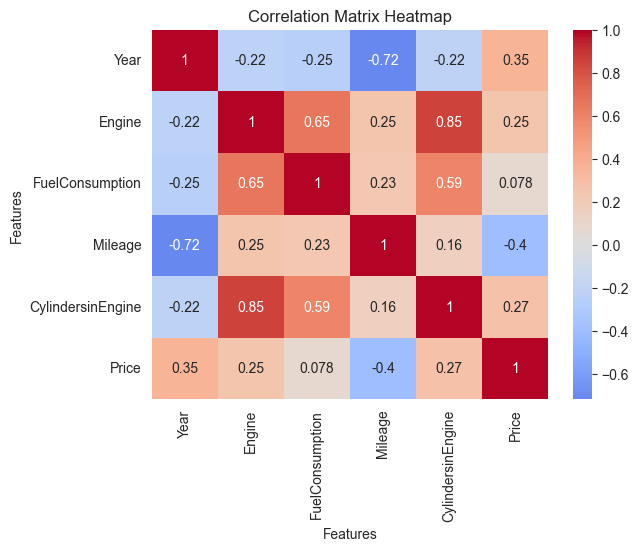

In [25]:
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation = car_df4.corr(numeric_only=True)

# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',center=0, annot=True)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()

- There is a negative correlarion between the price and the Kilometers Travelled.
- as the kilometres travelled increases the price decreases vis-vis.

Exploring Relationships
- Bivariate relationship

In [70]:
#Create a pair plot to view the relationship of price with predictors
# g = sns.pairplot(data=car_df4,hue='Car_Type',kind='scatter')
# g

From the plot it can be seen that the price of the cars are not uniformly distributed

- New cars have a lower milleage- That's why they are new cars..
- There are some used cars with lower milleage and they are quite expensive
- There are many outliers in the data
- The Price Column is not well distributed.This may lead to errors in the prediction model

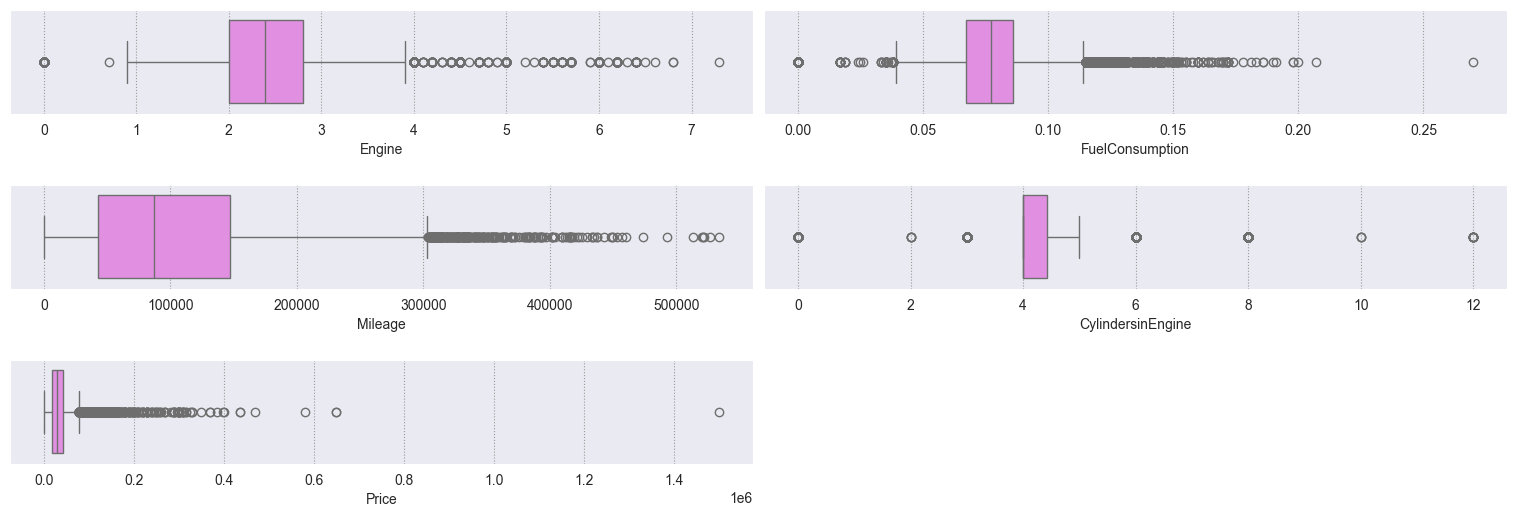

In [26]:
# Boxplot of numerical features


fig = plt.figure(figsize=(15, 5))
temp = car_df4.drop(['Brand','Year','Car_Type','Transmission','FuelType',"State","City"], axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data=car_df4, x=item,color='violet')
plt.tight_layout(pad=0.1, w_pad=0.8, h_pad=2.0)
plt.show()
    


In [27]:
#Removing Outliers
#df.loc[(df["BBB"] > 25) | (df["CCC"] >= -40), "AAA"]
def remove_outliers(df):
    for cols in df.columns:
        if df[cols].dtype == 'float64'or df[cols].dtype == 'int64': 
            Q1 = df[cols].quantile(0.25)
            Q3 = df[cols].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - (1.5 * IQR)
            upper_bound = Q3 + (1.5 * IQR)
            #df[cols] = np.where((df[cols] < lower_bound) | (df[cols] > upper_bound),df[cols].median(), df[cols])
            df = df.loc[(df[cols]>= lower_bound) & (df[cols]<= upper_bound),:]
            df.dropna(axis=1,inplace=True)
    return df 

In [28]:
# Normalize outliers in columns except Year
car_out = remove_outliers(car_df4)
car_out.shape

(10359, 12)

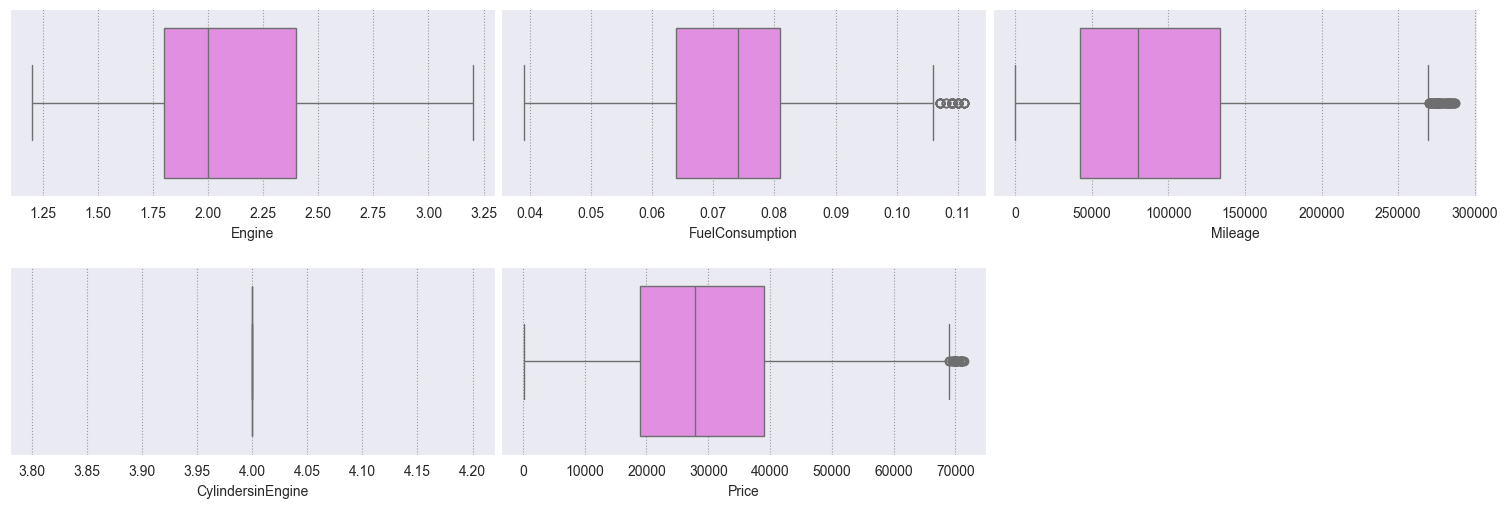

In [29]:

#Check new plot
fig = plt.figure(figsize=(15, 5))
temp = car_out.drop(['Brand','Year','Car_Type','Transmission','FuelType',"State","City"], axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=car_out, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [30]:
car_out2 =remove_outliers(car_out)
car_out2.shape

(10022, 12)

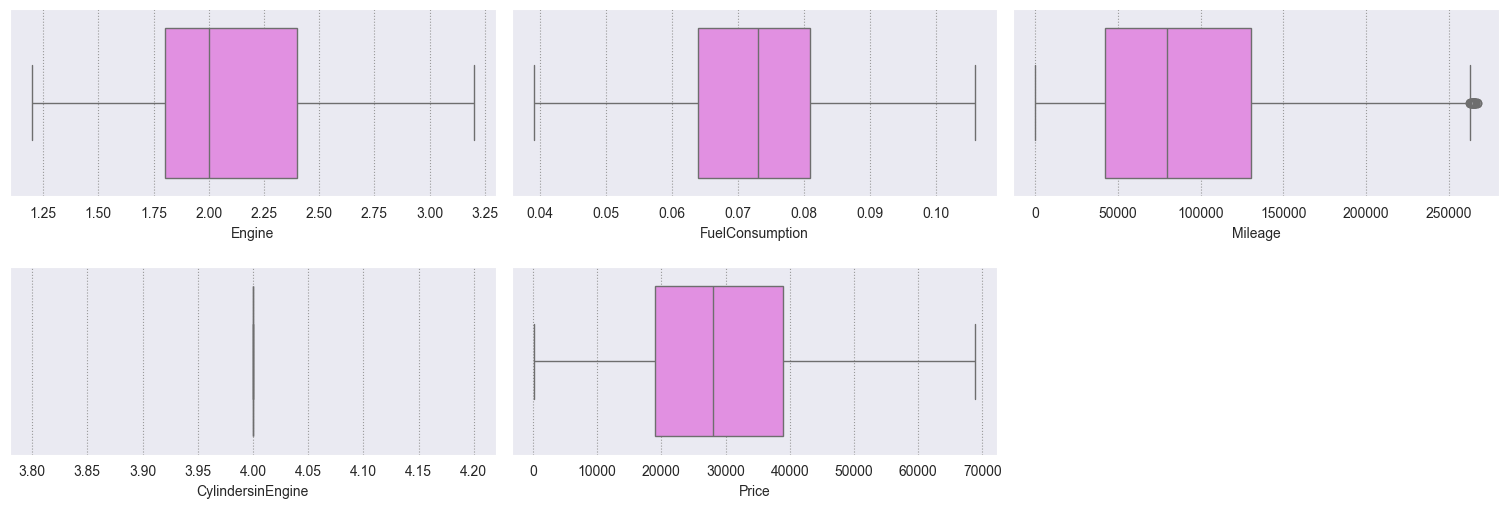

In [31]:
#Check new plot
fig = plt.figure(figsize=(15, 5))
temp = car_df4.drop(['Brand','Year','Car_Type','Transmission','FuelType',"State","City"], axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(2, 3, i+1)
    sns.boxplot(data=car_out2, x=item, color='violet')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

- Outliers have almost been completely removed from the dataset

In [32]:
#Create a pair plot to view the relationship of price with predictors
# g = sns.pairplot(data=car_out2.drop('CylindersinEngine',axis=1),hue='Car_Type',kind='scatter')
# g

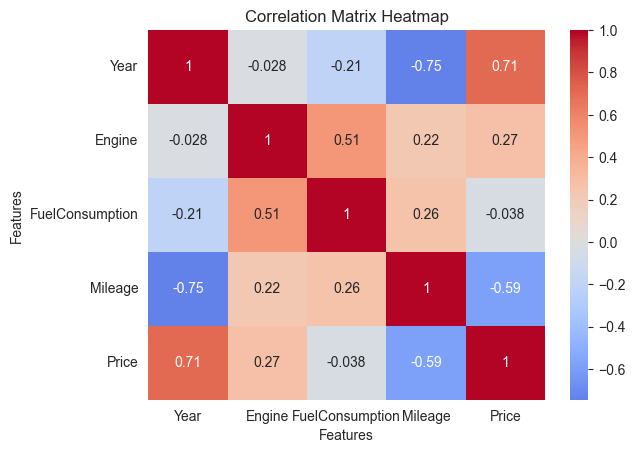

In [33]:
# Calculate correlation matrix
correlation = car_out2.drop('CylindersinEngine',axis=1).corr(numeric_only=True)

# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',center=0, annot=True)

# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Show plot
plt.show()

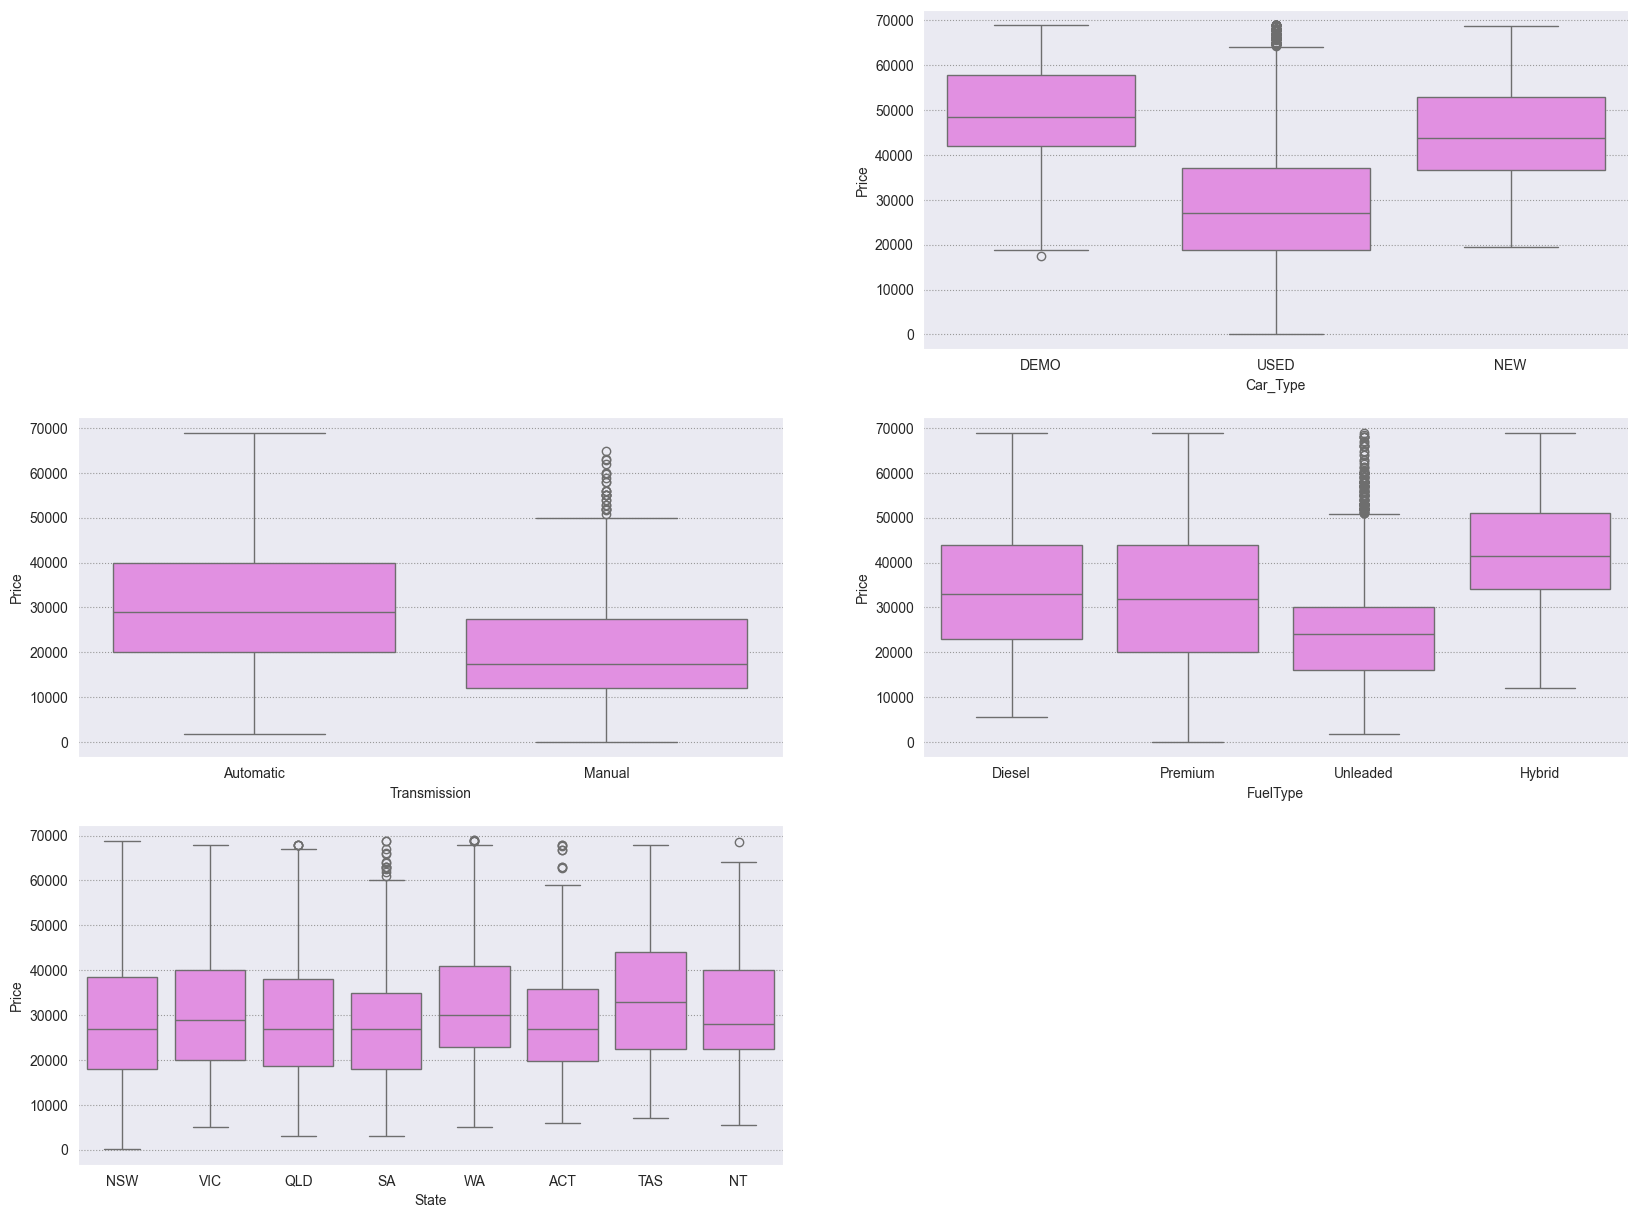

In [34]:
#Categorical features againt Price
fig = plt.figure(figsize=(20, 15))
#temp = car4.drop(['Brand','Year','UsedOrNew','Transmission','FuelType',"State","City"], axis=1).columns.tolist()
for i, item in enumerate(object_cols):
    if car_out[item].nunique() < 10:
        plt.subplot(3,2, i+1)
        sns.boxplot(data=car_out2, x=item, y='Price', color='violet')
#plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [35]:
#Group brands that have less unique rows and rename them

brand_stat = car_out.groupby('Brand')['Brand'].agg('count')
brands_with_less_cars = brand_stat[brand_stat < 100]


In [36]:
car_out2.Brand  = car_out.Brand.apply(lambda x: 'OtherCars' if x in brands_with_less_cars else x )
car_out2.head()

,Brand,Year,Car_Type,Transmission,Engine,FuelType,FuelConsumption,Mileage,CylindersinEngine,Price,State,City
0,OtherCars,2022.0,DEMO,Automatic,2.2,Diesel,0.087,5595.0,4.0,51990,NSW,Caringbah
1,MG,2022.0,USED,Automatic,1.5,Premium,0.067,16.0,4.0,19990,NSW,Brookvale
4,Renault,2022.0,USED,Automatic,1.3,Unleaded,0.060,1035.0,4.0,34990,NSW,Castle Hill
6,OtherCars,2017.0,USED,Automatic,2.0,Diesel,0.051,67662.0,4.0,62280,NSW,Blacktown
8,Toyota,2013.0,USED,Automatic,2.0,Premium,0.071,82012.0,4.0,24888,NSW,Mcgraths Hill


In [37]:
car_out2.describe()

,Year,Engine,FuelConsumption,Mileage,CylindersinEngine,Price
count,10022.000000,10022.000000,10022.000000,10022.000000,10022.0,10022.000000
mean,2016.871583,2.078298,0.072214,89919.238972,4.0,29853.976252
std,3.965369,0.431833,0.012648,63328.761066,0.0,14084.053751
min,2005.000000,1.200000,0.039000,1.000000,4.0,88.000000
25%,2014.000000,1.800000,0.064000,42324.250000,4.0,18990.000000
50%,2018.000000,2.000000,0.073000,79705.500000,4.0,27987.500000
75%,2020.000000,2.400000,0.081000,130439.500000,4.0,38990.000000
max,2023.000000,3.200000,0.106000,266900.000000,4.0,68900.000000


# Prepare the Data for Machine Learning Algorithms

In [38]:
#Drop Columns that have less importance 
car9=car_out2.drop(['FuelType','City','CylindersinEngine','State'],axis=1)
car9.head()

,Brand,Year,Car_Type,Transmission,Engine,FuelConsumption,Mileage,Price
0,OtherCars,2022.0,DEMO,Automatic,2.2,0.087,5595.0,51990
1,MG,2022.0,USED,Automatic,1.5,0.067,16.0,19990
4,Renault,2022.0,USED,Automatic,1.3,0.060,1035.0,34990
6,OtherCars,2017.0,USED,Automatic,2.0,0.051,67662.0,62280
8,Toyota,2013.0,USED,Automatic,2.0,0.071,82012.0,24888


In [39]:
#Split the dataset with Stratified split using the Engine column 
#for equal distribution of the data between
#test set and training set
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(car9, car9["Engine"]):
    strat_train_set = car9.iloc[train_index]
    strat_test_set = car9.iloc[test_index]

In [40]:
#Proportion of training set over the entire dataset
strat_train_set["Engine"].value_counts() / len(strat_train_set)


Engine
2.0    0.351628
2.5    0.147062
2.4    0.073469
1.8    0.063989
1.5    0.057004
1.6    0.052888
1.4    0.049520
2.8    0.049146
2.2    0.047649
3.0    0.034552
1.2    0.024698
2.3    0.017962
1.3    0.013471
2.1    0.006611
3.2    0.005488
1.9    0.001871
2.7    0.001497
1.7    0.001247
2.9    0.000249
Name: count, dtype: float64

In [41]:
#Proportion of Test set over the whole dataset
strat_test_set["Engine"].value_counts() / len(strat_test_set)


Engine
2.0    0.351621
2.5    0.147132
2.4    0.073815
1.8    0.064339
1.5    0.056858
1.6    0.052868
1.4    0.049377
2.8    0.048878
2.2    0.047382
3.0    0.034414
1.2    0.024938
2.3    0.017955
1.3    0.013466
2.1    0.006484
3.2    0.005486
1.9    0.001995
2.7    0.001496
1.7    0.000998
2.9    0.000499
Name: count, dtype: float64

In [42]:
#Copy the training set
car = strat_train_set.copy()
car.head()

,Brand,Year,Car_Type,Transmission,Engine,FuelConsumption,Mileage,Price
9898,Hyundai,2016.0,USED,Automatic,2.2,0.078,73252.0,35900
2709,Volkswagen,2022.0,NEW,Automatic,1.4,0.077,13.0,57990
8195,OtherCars,2020.0,USED,Automatic,1.2,0.048,40532.0,21950
11856,Nissan,2016.0,USED,Automatic,1.6,0.053,67115.0,25880
9925,Hyundai,2021.0,USED,Automatic,2.0,0.062,37935.0,27998


In [43]:
#Separate into dependent and independent features
car_feat = car.drop('Price',axis=1)
car_label = car[['Price']]

In [44]:
#Make another copy of the new dataframe
X = car_feat.copy()
y = car_label.copy()


# First let us standardize the numerics and encode the categorical variables

cat_col = []
num_col = []

for col in X.columns:
    if X[col].dtype == 'float64'or X[col].dtype == 'int64':
        num_col.append(col)
    else:
        cat_col.append(col)


#Using Column Transformer to transfor numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(),num_col),
        ("cat", OneHotEncoder(), cat_col),
    ],verbose_feature_names_out=False
)

preprocessor.fit(car_feat)
X_tr = preprocessor.transform(car_feat).toarray()
#Transformed Dependent features
X_tr

array([[-0.21476489,  0.28181805,  0.45562133, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.29203508, -1.57085543,  0.3763024 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.78976842, -2.03402379, -1.92394668, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.5386351 , -0.64451869, -0.49620587, ...,  1.        ,
         1.        ,  0.        ],
       [-0.46589821,  0.28181805,  0.45562133, ...,  1.        ,
         1.        ,  0.        ],
       [-0.21476489, -0.18135032, -2.08258455, ...,  1.        ,
         1.        ,  0.        ]])

In [45]:
#Using Linear Regression Model 
lin_reg = LinearRegression()

lin_reg.fit(X_tr, car_label)


LinearRegression()

In [46]:
#Using mean square error to test the acuracy of prediction
from sklearn.metrics import mean_squared_error
car_predictions = lin_reg.predict(X_tr)
lin_mse = mean_squared_error(car_label, car_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

7346.740106899696

In [47]:
#Using the Decision tree Model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_tr, car_label)


DecisionTreeRegressor()

In [48]:
#Using mean square error to test the acuracy of prediction
car_predictions = tree_reg.predict(X_tr)
tree_mse = mean_squared_error(car_label, car_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


365.16604835810955

# Better Evaluation Using Cross-Validation

In [49]:
#Import cross-validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg,X_tr,car_label,scoring="neg_mean_squared_error", cv=10)

tree_rmse_scores = np.sqrt(-scores)


In [50]:
#A function to display the corresponding scores and mean
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())


In [51]:
display_scores(tree_rmse_scores)


Scores: [6474.85313562 6054.37836647 6496.67583873 6681.39106394 6495.39032594
 6133.81782661 6718.00795456 6448.6228866  6420.74016162 6492.92613843]
Mean: 6441.680369852753
Standard deviation: 197.16055673414945


In [52]:
#Linear Regression
lin_scores = cross_val_score(lin_reg,X_tr,car_label,scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [7553.39322553 7406.27131424 7500.51577478 7832.78486615 7332.79886015
 6984.37309775 7220.83502461 7295.14197502 7146.46365144 7417.0142186 ]
Mean: 7368.959200827287
Standard deviation: 222.77047218803492


In [53]:
#Its time to test another model 
#Using RandomForest model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_tr, car_label)

RandomForestRegressor()

In [54]:
forest_scores = cross_val_score(forest_reg,X_tr,car_label,scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [4614.91835959 4745.47357377 5136.19875163 5389.13513852 4795.152643
 4605.13817803 4935.28180589 4982.13479364 4890.87600918 5092.3152371 ]
Mean: 4918.662449035027
Standard deviation: 232.31571452880715


- Random Forest seems to perform better

In [55]:
#Fine tune to find the best params for the model
from sklearn.model_selection import GridSearchCV

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_tr, car_label)





GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [56]:
grid_search.best_params_
# Print the best parameter values and score
print('Best parameter values: ', grid_search.best_params_)
#print('Best score: ', rf_grid_search.best_score_)


Best parameter values:  {'max_features': 2, 'n_estimators': 30}


In [57]:

print(f'Best Estimator: {grid_search.best_estimator_}')

Best Estimator: RandomForestRegressor(max_features=2, n_estimators=30)


In [58]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


5829.474731334159 {'max_features': 2, 'n_estimators': 3}
5028.096930549064 {'max_features': 2, 'n_estimators': 10}
4819.40694456064 {'max_features': 2, 'n_estimators': 30}
5949.608567956402 {'max_features': 4, 'n_estimators': 3}
5107.923888655128 {'max_features': 4, 'n_estimators': 10}
4892.828169956657 {'max_features': 4, 'n_estimators': 30}
5772.648556023275 {'max_features': 6, 'n_estimators': 3}
5122.371910168701 {'max_features': 6, 'n_estimators': 10}
4929.534407996787 {'max_features': 6, 'n_estimators': 30}
5800.85967217126 {'max_features': 8, 'n_estimators': 3}
5190.820338709175 {'max_features': 8, 'n_estimators': 10}
4929.699503763409 {'max_features': 8, 'n_estimators': 30}
5760.127290903372 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
5093.736563937208 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
5612.210912524948 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
5095.957343558778 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}


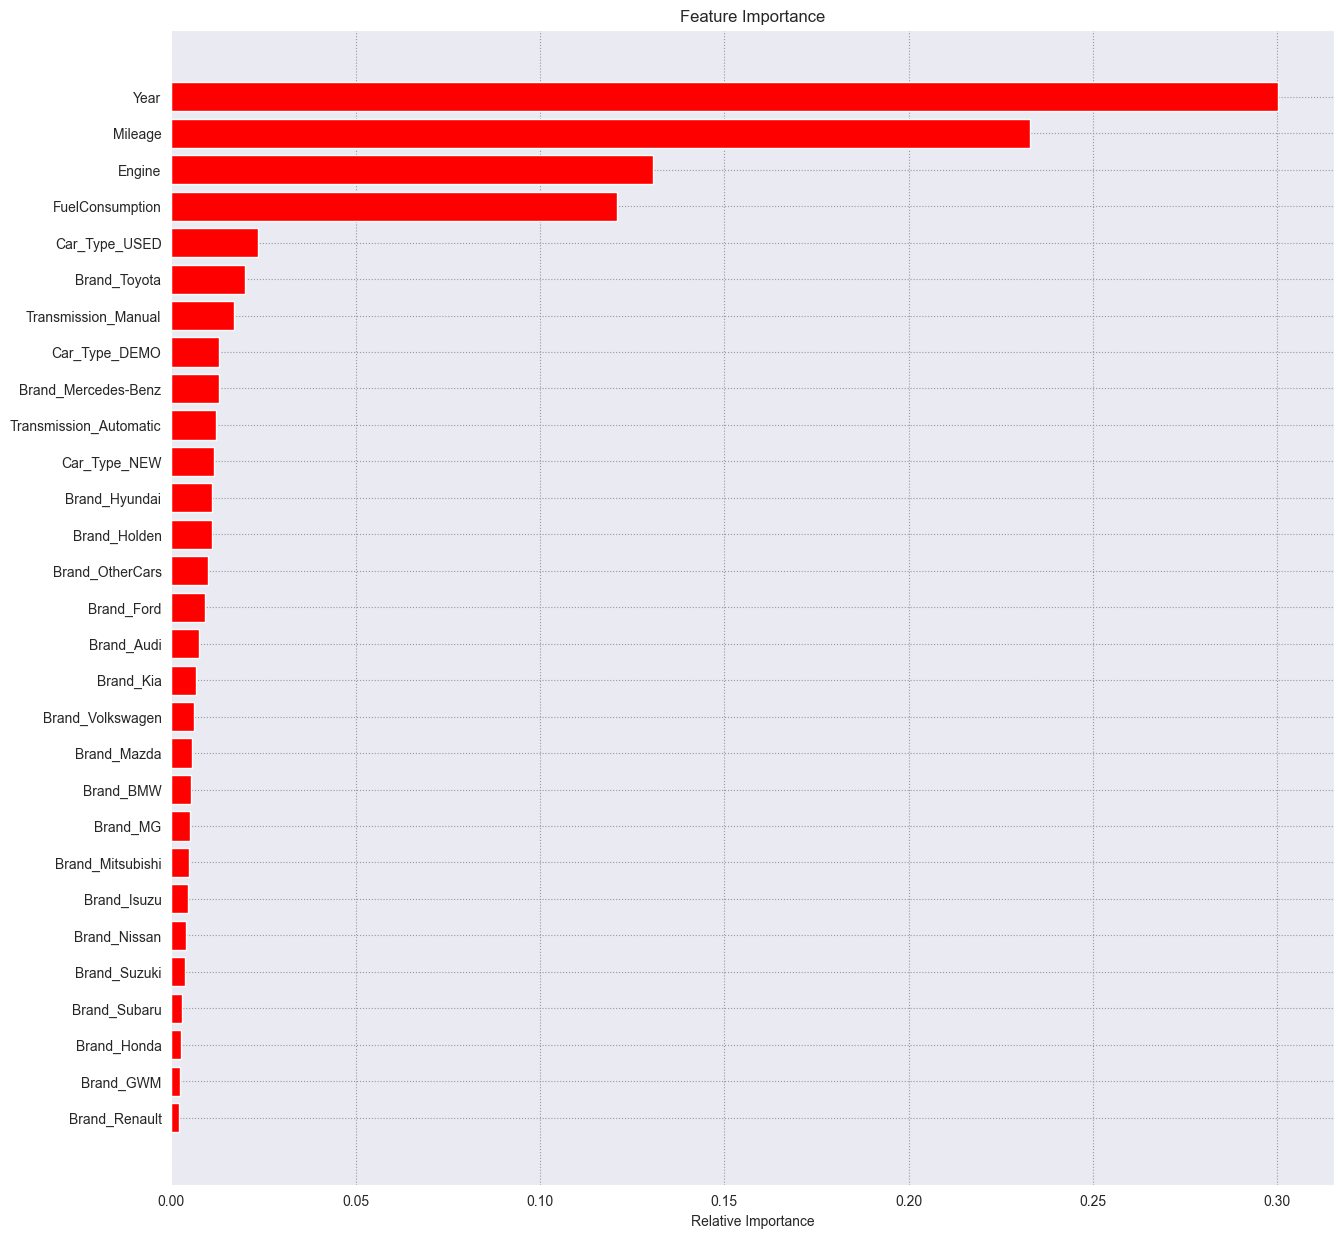

In [59]:
#Lets check the feature importance of the model
features = preprocessor.get_feature_names_out()

# store the importance of the feature
importances = grid_search.best_estimator_.feature_importances_


indices = np.argsort(importances)


plt.figure(figsize=(15,15))
# title of the graph
plt.title('Feature Importance')


plt.barh(range(len(indices)),importances[indices],color='red',align='center')

# plot bar chart
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [60]:
#final test
final_model = grid_search.best_estimator_
#copy the test split
X_test = strat_test_set.drop("Price", axis=1)
y_test = strat_test_set['Price'].copy()

#Preprocess the test dataset
X_test_prepared = preprocessor.transform(X_test).toarray()

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)

final_rmse = np.sqrt(final_mse) 
final_rmse

4438.0793579501815

<Axes: ylabel='Price'>

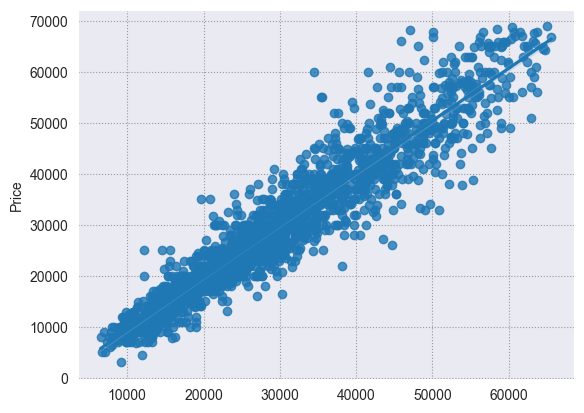

In [61]:
y_pred = final_predictions
sns.regplot(x=y_pred,y=y_test)

In [62]:
residual = y_test - y_pred
print(residual)

4014     -1934.866667
10453     4543.866667
13893   -11256.266667
10286      634.066667
238       3013.000000
             ...     
4139     -1475.566667
2630     -9781.966667
16433     1699.208333
4776     -2748.666667
4808       971.033333
Name: Price, Length: 2005, dtype: float64


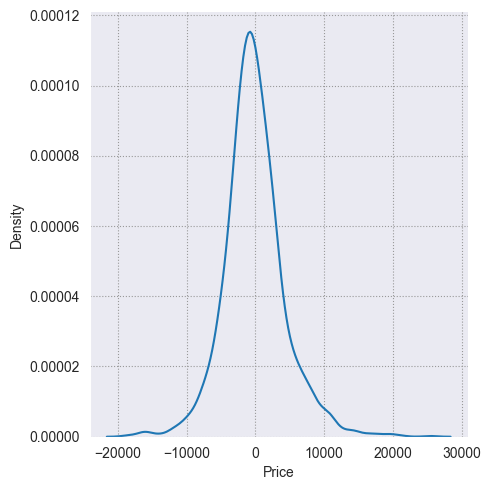

In [63]:
#Plot the residual
sns.displot(residual,kind='kde')

<Axes: title={'center': 'Residual vs Predicted'}, xlabel='Predicted', ylabel='Residual'>

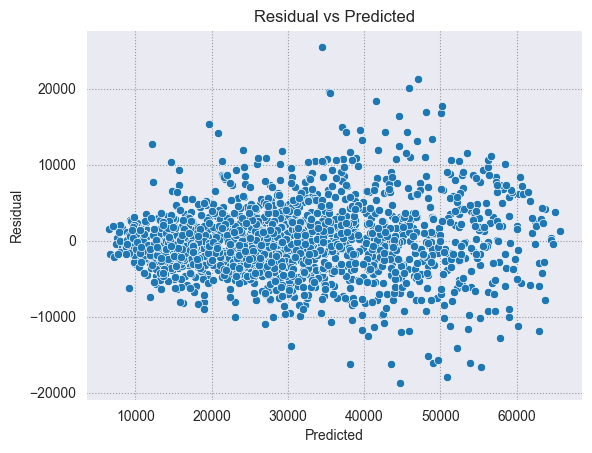

In [64]:
#Plot of residual and predicted value
plt.title('Residual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residual')
sns.scatterplot(x=y_pred,y=residual)

In [65]:
x = X_test_prepared[:12]
y= y_test.iloc[:12]
forest_reg.fit(x,y)
y_p = forest_reg.predict(x)
y_p

array([17709.17, 19375.89, 43229.61, 17431.58, 24127.51, 22062.92,
       39794.57, 29237.19, 14317.49, 37865.94, 17892.54, 47451.6 ])

In [66]:
print(y)

4014     10999
10453    19886
13893    39990
10286    16990
238      23990
5929     18750
12043    48888
598      28990
11503    11989
7187     38100
9655     15990
12589    55990
Name: Price, dtype: int64


In [67]:
#Check performance with r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.8994099470597468


- This shows that the model is close to accurate

In [68]:
import pickle

pickle.dump(preprocessor,open('scale.pkl','wb'))

pickle.dump(final_model,open('reg_model.pkl','wb'))


In [69]:
pic_model = pickle.load(open('reg_model.pkl','rb'))
pic_model.predict(X_test_prepared[0].reshape(1,-1))

array([12933.86666667])

## The R2-Score: 0.899409